<a href="https://colab.research.google.com/github/aishwarya-hds5210/data-5160-02/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS 5210-2023 Final Project

**COVID 19 vaccination coverage and its effectiveness**

The COVID-19 pandemic has had a profound impact on the world, causing widespread illness, death, and economic disruption. In response to the pandemic, governments and health organizations have implemented a range of measures to control the spread of the virus, including lockdowns, mask mandates, and social distancing. One of the most important tools in the fight against COVID-19 has been vaccination.

This project aims to enhance our understanding of the relationship between vaccination efforts and COVID-19 outcomes. The development of COVID-19 vaccines was a significant scientific breakthrough, yet challenges persist in achieving widespread vaccination. Access to vaccines remains limited in certain regions, prompting the need to evaluate the effectiveness of vaccination campaigns in controlling the COVID-19 pandemic. This study delves into the intricacies of vaccine distribution, COVID-19 case trends, and the relationship between vaccination efforts and COVID-19 outcomes. By analyzing various datasets, the study aims to identify patterns that shed light on the effectiveness of vaccination strategies. The findings of this research hold theoretical implications for healthcare practices, public health policies, and the development of effective mitigation strategies for infectious disease outbreaks.

# 1. Data access and formats

> **[Covid-19 vaccinations](https://covid.cdc.gov/covid-data-tracker/#vaccinations_vacc-people-booster-percent-total) - CSV Format** - This dataset has the number of doses administered within the state or territory and all the data regarding the vaccinations like for every 100,000 people of the all residents.

> **[USA States list](https://public.opendatasoft.com/explore/dataset/georef-united-states-of-america-state/export/?flg=en-us&disjunctive.ste_code&disjunctive.ste_name&sort=year) - JSON Format** - This dataset has all the states in USA taken from open data soft platform

> **[USA population report](https://data.ers.usda.gov/reports.aspx?ID=17827#P1ff24a62cb5e47208500bbfdc53e3a43_3_137iT3) - Excel format** - This dataset is a population report given by united states department of agriculture.

> **[Covid 19 cases data](https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state)** - This dataset has all the statistics of covid cases from california state provided by California Department of Public Health

> **[Post vaccination data](https://healthdata.gov/State/COVID-19-Post-Vaccination-Infection-Data-ARCHIVED-/6ppi-ka49) - CSV Format** - This dataset has all the covid - 19 post vaccination data from Health data. This report's main source is also California Department of Public Health

**1-1. Importing libraries**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

**1-2. Load datasets**

In [36]:
covid_data = pd.read_csv("/content/drive/MyDrive/covid19_vaccinations_in_the_united_states.csv")

In [37]:
USA_States = pd.read_json("/content/drive/MyDrive/georef-united-states-of-america-state.json")

In [38]:
USA_population = pd.read_excel("/content/drive/MyDrive/PopulationReport.xlsx")

In [39]:
covid_cases = pd.read_csv("/content/drive/MyDrive/covid19cases_test.csv")

In [40]:
post_vaccination = pd.read_csv("/content/drive/MyDrive/covid19postvaxstatewidestats.csv")

**1-3 Datasets inspection**

In [41]:
# Load USA states list and inspect for the required columns
USA_States.head()

,geo_point_2d,geo_shape,year,ste_code,ste_name,ste_area_code,ste_type,ste_stusps_code,ste_fp_code,ste_gnis_code
0,"{'lon': -120.5928034897229, 'lat': 47.41161380...","{'type': 'Feature', 'geometry': {'coordinates'...",2022,[53],[Washington],USA,state,WA,NaN,1779804
1,"{'lon': -106.10844349925604, 'lat': 34.4212989...","{'type': 'Feature', 'geometry': {'coordinates'...",2022,[35],[New Mexico],USA,state,NM,NaN,897535
2,"{'lon': -71.50397526286355, 'lat': 42.16009070...","{'type': 'Feature', 'geometry': {'coordinates'...",2022,[25],[Massachusetts],USA,state,MA,NaN,606926
3,"{'lon': -111.67824939585202, 'lat': 39.3237667...","{'type': 'Feature', 'geometry': {'coordinates'...",2022,[49],[Utah],USA,state,UT,NaN,1455989
4,"{'lon': -92.43838227416394, 'lat': 34.89991914...","{'type': 'Feature', 'geometry': {'coordinates'...",2022,[05],[Arkansas],USA,state,AR,NaN,68085


In [42]:
# Ensure data type of state names are string
USA_States['ste_name'] = USA_States['ste_name'].astype('string')

In [43]:
# Load Covid-19 vaccination list and inspect for the required columns
covid_data.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


# 2. Data Transformation

**2-1. Data transformation: Data manipulaton, standardize, clean, filter and rename**

In [44]:
# Cleaning State/Territory Names in covid_data DataFrame
covid_data['Jurisdiction (State/Territory) or Federal Entity'] = (
    covid_data['Jurisdiction (State/Territory) or Federal Entity']
    .str.replace(r'\[|\]|\'', '')
    .str.strip()
)

# Cleaning State Names in USA_States DataFrame
USA_States['ste_name'] = (
    USA_States['ste_name']
    .str.replace(r'\[|\]|\'', '')
    .str.strip()
)

# Convert state names to uppercase for consistency
covid_data['Jurisdiction (State/Territory) or Federal Entity'] = (
    covid_data['Jurisdiction (State/Territory) or Federal Entity'].str.upper()
)
USA_States['ste_name'] = USA_States['ste_name'].str.upper()

<ipython-input-44-818b54d34ea6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(r'\[|\]|\'', '')
<ipython-input-44-818b54d34ea6>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(r'\[|\]|\'', '')


**Data Merging**

Filter the covid_data DataFrame to include only rows where the 'Jurisdiction (State/Territory) or Federal Entity' column matches state names present in the USA_States DataFrame.

In [45]:
# Filter COVID vaccination dataset for USA states
covid_vaccination_usa = covid_data[
    covid_data['Jurisdiction (State/Territory) or Federal Entity'].isin(USA_States['ste_name'])
]

In [46]:
# Original dataset
covid_data.shape

(64, 63)

In [47]:
# Filtered dataset with only USA states
covid_vaccination_usa.shape

(53, 63)

In [48]:
# Renaming first column to State name as we have only state names.
covid_vaccination_usa = covid_vaccination_usa.rename(columns = {'Jurisdiction (State/Territory) or Federal Entity': 'State name'})
covid_vaccination_usa.head()

,State name,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
1,ALASKA,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,ALABAMA,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,ARKANSAS,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,AMERICAN SAMOA,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN
5,ARIZONA,19959120,274212.0,353980.0,14647405,201236.0,13071728,231831.0,5704677,78.4,...,1147905,16.8,1118947,18.0,1074856,19.1,523583,40.0,NaN,NaN


In [49]:
# Reset index of the covid_vaccination_usa DataFrame and dropping the old index.
covid_vaccination_usa = covid_vaccination_usa.reset_index(drop = True)

# 3. Data Merging

**3-1. Data manipulation: Sort data before merging the datasets**

Sort the data in Covid vaccination dataset in descending order of its population. Since there is no population column in covid data, need to merge another dataset USA population here

In [50]:
# Ensure data type are string and convert to upper case format
USA_population['Name'] = USA_population['Name'].astype('string')
USA_population['Name'] = USA_population['Name'].str.upper()

# Dropping all other columns except 2022 population
USA_population = USA_population.drop(columns = ['Pop. 1990', 'Pop. 2000', 'Pop. 2010', 'Pop. 2020', 'Change 2020-22'])

**3-2. Data merging**

Here, merge Covid vaccination and USA Population datasets, dropping duplicate columns to avoid any data redundancy and inspect the new dataframe.

In [51]:
# Merging Covid vaccination dataset and USA Population to get population of each state in the covid vaccination dataset
covid_vaccination_usa = pd.merge(
    covid_vaccination_usa,
    USA_population,
    left_on = 'State name',
    right_on = 'Name',
    how = 'left'
)

**3-3. Data redundancy**

In [52]:
# Drop the duplicated state name column
covid_vaccination_usa = covid_vaccination_usa.drop(columns = ['Name'])

In [53]:
# Inspect the new dataframe obtained
covid_vaccination_usa.head()

,State name,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered,Pop. 2022
0,ALASKA,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN,733583.0
1,ALABAMA,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN,5074296.0
2,ARKANSAS,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN,3045637.0
3,AMERICAN SAMOA,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN,NaN
4,ARIZONA,19959120,274212.0,353980.0,14647405,201236.0,13071728,231831.0,5704677,78.4,...,16.8,1118947,18.0,1074856,19.1,523583,40.0,NaN,NaN,7359197.0


In [54]:
# This is to move the last column population to beside state column
column = covid_vaccination_usa.pop('Pop. 2022')

# Insert the column to the new position
covid_vaccination_usa.insert(1, column.name, column)
covid_vaccination_usa.head()

,State name,Pop. 2022,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,ALASKA,733583.0,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
1,ALABAMA,5074296.0,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
2,ARKANSAS,3045637.0,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
3,AMERICAN SAMOA,NaN,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN
4,ARIZONA,7359197.0,19959120,274212.0,353980.0,14647405,201236.0,13071728,231831.0,5704677,...,1147905,16.8,1118947,18.0,1074856,19.1,523583,40.0,NaN,NaN


Now we have Covid vaccination data in USA states along with population in each state.

**Now let's focus on top 10 states based on population**

In [55]:
# Filtering the vaccination data based on population of USA states
covid_vaccination_usa = covid_vaccination_usa.sort_values(by = 'Pop. 2022', ascending = False).reset_index(drop = True)

# Selecting top 10 states based on population
covid_vaccination_usa = covid_vaccination_usa.head(10)
covid_vaccination_usa

,State name,Pop. 2022,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,CALIFORNIA,39029342.0,121107865,306507.0,395550.0,88487852,223951.0,78293473,255714.0,33613401,...,8114063,21.9,7885573,23.4,7555616,24.7,2821306,48.3,NaN,NaN
1,TEXAS,30029572.0,80813315,278706.0,374204.0,52510128,181095.0,45886244,212475.0,22322586,...,3288778,12.2,3205609,13.3,3085576,14.3,1282757,34.4,NaN,NaN
2,FLORIDA,22244823.0,61526685,286467.0,356722.0,42267369,196796.0,39182461,227174.0,17810446,...,2521516,12.4,2494931,13.3,2447806,14.2,1402788,31.2,NaN,NaN
3,PENNSYLVANIA,12972008.0,42895735,335071.0,421896.0,27586432,215486.0,24920539,245103.0,11666613,...,2404885,19.9,2349980,21.2,2271654,22.3,1105455,46.2,NaN,NaN
4,ILLINOIS,12582032.0,38328915,302474.0,388970.0,26859342,211961.0,23826876,241800.0,10036899,...,2565334,21.5,2493575,23.0,2397509,24.3,1015847,49.7,NaN,NaN
5,OHIO,11756058.0,31703485,271223.0,347966.0,21104771,180551.0,19234406,211110.0,7707458,...,1896883,17.2,1853431,18.5,1794636,19.7,896254,43.8,NaN,NaN
6,GEORGIA,10912876.0,28727475,270569.0,354068.0,17124791,161290.0,15542310,191560.0,7287758,...,1126791,11.3,1103841,12.3,1067468,13.2,476297,31.4,NaN,NaN
7,NORTH CAROLINA,10698973.0,30278310,288692.0,369817.0,19434544,185301.0,17562898,214512.0,9456334,...,1556847,15.8,1521473,16.9,1468583,17.9,692266,39.5,NaN,NaN
8,MICHIGAN,10034113.0,29638290,296773.0,377898.0,18769116,187938.0,17096779,217990.0,6979192,...,1799688,19.1,1760141,20.5,1704974,21.7,833254,47.2,NaN,NaN
9,NEW JERSEY,9261699.0,29637655,333675.0,426833.0,19826065,223211.0,17720714,255209.0,8430561,...,1517614,18.1,1485382,19.5,1434973,20.7,607360,41.2,NaN,NaN


In [56]:
import scipy.stats as stats

# Selecting relevant columns
doses_data = covid_vaccination_usa[['Total doses distributed', 'Total doses administered by jurisdiction']].dropna()

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(doses_data['Total doses distributed'], doses_data['Total doses administered by jurisdiction'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.9969701058383069
P-value: 3.673736246266948e-10


# Data visualization 1
Bar chart for Population 2022 and Total doses administered by jurisdiction

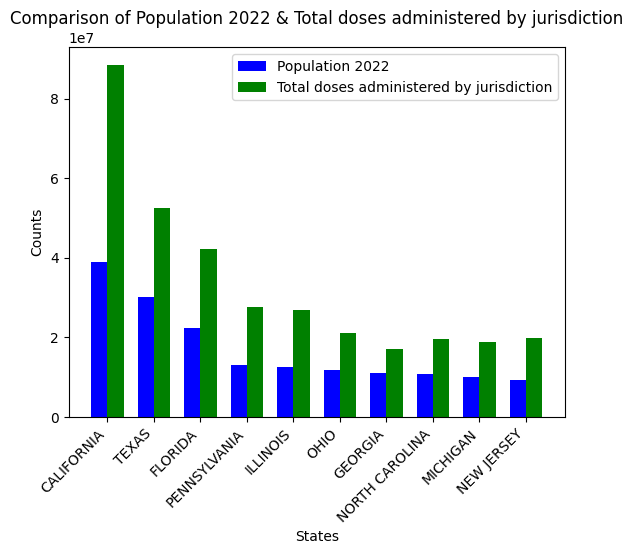

In [57]:
bar_width = 0.35
index = np.arange(len(covid_vaccination_usa['State name']))

plt.bar(index, covid_vaccination_usa['Pop. 2022'], width = bar_width, label = 'Population 2022', color = 'blue')
plt.bar(index + bar_width, covid_vaccination_usa['Total doses administered by jurisdiction'], width = bar_width, label = 'Total doses administered by jurisdiction', color = 'green')

plt.title('Comparison of Population 2022 & Total doses administered by jurisdiction')
plt.xlabel('States')
plt.ylabel('Counts')
plt.xticks(index + bar_width / 2, covid_vaccination_usa['State name'], rotation = 45, ha = 'right')
plt.legend()

**Interpretation:**

- Some states with larger populations, such as California, Texas, and Florida, also have higher total doses administered.
- The green bars (total doses administered) are significantly shorter than the blue bars (population) for most states, indicating that the total doses administered are relatively lower than the population.

# Data visualization 2
Multi line chart for Comparison of Total Doses Distributed and Total Doses Administered by State (USA)

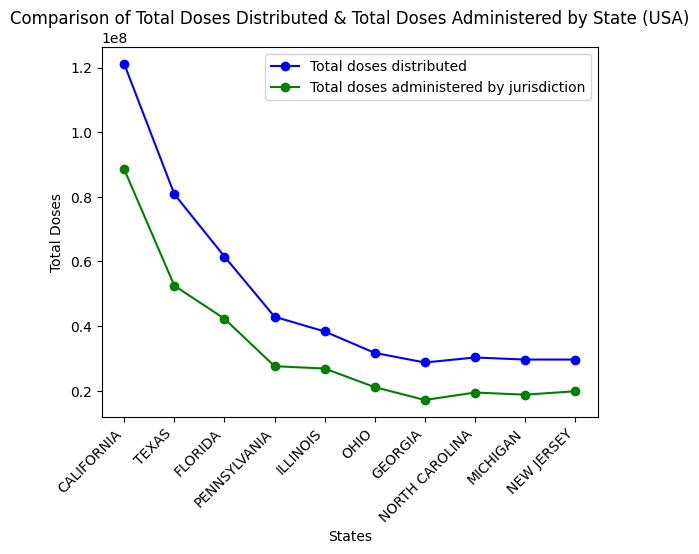

In [58]:
# Plot multi line chart
plt.plot(covid_vaccination_usa['State name'], covid_vaccination_usa['Total doses distributed'], marker = 'o', label = 'Total doses distributed', color = 'blue')
plt.plot(covid_vaccination_usa['State name'], covid_vaccination_usa['Total doses administered by jurisdiction'], marker = 'o', label = 'Total doses administered by jurisdiction', color = 'green')

plt.title('Comparison of Total Doses Distributed & Total Doses Administered by State (USA)')
plt.xlabel('States')
plt.ylabel('Total Doses')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()

plt.show()

**Interpretation:**

- California, Texas, and Florida are among the top states for doses distributed per 100k population.
- The data labels with percentages provide insights into the proportion of doses distributed compared to the maximum value in the dataset.

**Overall inference from the visualization 1 & 2:**
- States with larger populations tend to have higher total doses administered, which is expected.
- The distribution of doses administered may not be proportional to the population, indicating potential variations in vaccination campaigns and strategies among states.
- California, Texas, and Florida are prominent in both visualizations, emphasizing their significance in terms of both population and vaccination efforts.
- The disparities in doses administered among states may be influenced by factors such as vaccination campaigns, public awareness, healthcare infrastructure, and logistical efficiency.



California is at top 1 populated state. So let's analyse covid cases data and post vaccination data by date for 'California' state.

In [59]:
# Filter the covid cases only for the state of california
covid_cases = covid_cases[covid_cases['area'] == 'California']
covid_cases.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests
6920,2020-02-01,California,State,40129160.0,25.0,25.0,0.0,0.0,58.0,58,2.0,2
6921,2020-02-02,California,State,40129160.0,9.0,34.0,0.0,0.0,42.0,100,3.0,5
6922,2020-02-03,California,State,40129160.0,7.0,41.0,0.0,0.0,25.0,125,0.0,5
6923,2020-02-04,California,State,40129160.0,3.0,44.0,0.0,0.0,30.0,155,1.0,6
6924,2020-02-05,California,State,40129160.0,3.0,47.0,0.0,0.0,46.0,201,1.0,7


In [60]:
# Dropping unwanted columns
covid_cases.drop(columns = ['area', 'area_type'])

,date,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests
6920,2020-02-01,40129160.0,25.0,25.0,0.0,0.0,58.0,58,2.0,2
6921,2020-02-02,40129160.0,9.0,34.0,0.0,0.0,42.0,100,3.0,5
6922,2020-02-03,40129160.0,7.0,41.0,0.0,0.0,25.0,125,0.0,5
6923,2020-02-04,40129160.0,3.0,44.0,0.0,0.0,30.0,155,1.0,6
6924,2020-02-05,40129160.0,3.0,47.0,0.0,0.0,46.0,201,1.0,7
...,...,...,...,...,...,...,...,...,...,...
8299,2023-11-11,40129160.0,719.0,11498284.0,7.0,104768.0,10060.0,204353192,888.0,14094670
8300,2023-11-12,40129160.0,721.0,11499005.0,12.0,104780.0,9515.0,204362707,864.0,14095534
8301,2023-11-13,40129160.0,626.0,11499631.0,6.0,104786.0,7404.0,204370111,673.0,14096207
8302,2023-11-14,40129160.0,0.0,11499631.0,9.0,104795.0,NaN,204370111,NaN,14096207


In [61]:
# Inspect for post vaccination data
post_vaccination.head()

,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
0,2021-02-01,California,State,14595,24,781,1,12,0,36190068,339372,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-02,California,State,12076,21,599,0,15,0,36073331,373679,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03,California,State,11009,25,557,0,18,0,35938325,410320,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-04,California,State,9661,17,487,0,19,0,35774605,431692,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-05,California,State,8984,17,507,1,27,0,35611210,447446,NaN,NaN,NaN,NaN,NaN,NaN


'Covid cases' data has more time period whereas 'post vaccination' has less time period. Let's make covid cases and post vaccination with same time periods.

In [62]:
# Convert the values to datetime format
covid_cases['date'] = pd.to_datetime(covid_cases['date'])
post_vaccination['date'] = pd.to_datetime(post_vaccination['date'])

# Filter data in covid cases dataset to match post vaccination data based on date
covid_cases = covid_cases[(covid_cases['date'] >= post_vaccination['date'].iloc[0]) & (covid_cases['date'] <= post_vaccination['date'].iloc[788])]

In [63]:
covid_cases.reset_index(drop=True)

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests
0,2021-02-01,California,State,40129160.0,15273.0,3367007.0,481.0,52429.0,341002.0,44219524,21001.0,3950808
1,2021-02-02,California,State,40129160.0,12639.0,3379646.0,401.0,52830.0,317608.0,44537132,19236.0,3970044
2,2021-02-03,California,State,40129160.0,11535.0,3391181.0,386.0,53216.0,297932.0,44835064,18519.0,3988563
3,2021-02-04,California,State,40129160.0,10153.0,3401334.0,369.0,53585.0,289889.0,45124953,16396.0,4004959
4,2021-02-05,California,State,40129160.0,9449.0,3410783.0,406.0,53991.0,229862.0,45354815,15092.0,4020051
...,...,...,...,...,...,...,...,...,...,...,...,...
784,2023-03-27,California,State,40129160.0,1806.0,11193476.0,15.0,101693.0,59326.0,198869740,2101.0,13757478
785,2023-03-28,California,State,40129160.0,1666.0,11195142.0,20.0,101713.0,55287.0,198925027,1851.0,13759329
786,2023-03-29,California,State,40129160.0,1656.0,11196798.0,22.0,101735.0,51884.0,198976911,1995.0,13761324
787,2023-03-30,California,State,40129160.0,1607.0,11198405.0,19.0,101754.0,47721.0,199024632,1798.0,13763122


# 4. Data aggregation and pivoting

**4-1. Data sorting**

Here we have covid cases from 2021 to 2023. Lets analyse the initial stage of covid cases that are for the year of 2021.


In [64]:
# Filter the covid cases data with only 2021 year data
covid_cases_data = covid_cases.loc[covid_cases['date'] < '2021-12-31']
covid_cases_data

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests
7286,2021-02-01,California,State,40129160.0,15273.0,3367007.0,481.0,52429.0,341002.0,44219524,21001.0,3950808
7287,2021-02-02,California,State,40129160.0,12639.0,3379646.0,401.0,52830.0,317608.0,44537132,19236.0,3970044
7288,2021-02-03,California,State,40129160.0,11535.0,3391181.0,386.0,53216.0,297932.0,44835064,18519.0,3988563
7289,2021-02-04,California,State,40129160.0,10153.0,3401334.0,369.0,53585.0,289889.0,45124953,16396.0,4004959
7290,2021-02-05,California,State,40129160.0,9449.0,3410783.0,406.0,53991.0,229862.0,45354815,15092.0,4020051
...,...,...,...,...,...,...,...,...,...,...,...,...
7614,2021-12-26,California,State,40129160.0,36283.0,5180031.0,65.0,77728.0,237171.0,120559464,42473.0,6267779
7615,2021-12-27,California,State,40129160.0,76208.0,5256239.0,87.0,77815.0,482867.0,121042331,89628.0,6357407
7616,2021-12-28,California,State,40129160.0,89559.0,5345798.0,59.0,77874.0,515088.0,121557419,104917.0,6462324
7617,2021-12-29,California,State,40129160.0,88890.0,5434688.0,81.0,77955.0,507951.0,122065370,107771.0,6570095


**4-2-1. Data pivoting**

Here we have covid cases of the year 2021 but with all the 365 days. Filtering this data such that it has each month data

In [65]:
# Create a pivot table with 2021 covid cases data
covid_cases_2021 = covid_cases_data.pivot_table(index = covid_cases_data['date'].dt.month_name(),
                                                values = ['positive_tests', 'cases'],
                                                aggfunc = 'sum')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the month index to a categorical data type with custom order
covid_cases_2021.index = pd.Categorical(covid_cases_2021.index, categories = month_order, ordered = True)

# Sort the pivot table based on the custom order
covid_cases_2021.sort_index(inplace = True)

# Index Naming
covid_cases_2021.index.name = 'Month'
covid_cases_2021

,cases,positive_tests
Month,,
February,170573.0,254647.0
March,76701.0,104391.0
April,60365.0,80784.0
May,34990.0,48155.0
June,32994.0,41075.0
July,189940.0,227786.0
August,387058.0,512221.0
September,231402.0,305152.0
October,163525.0,204434.0


# Data visualization 3
Stacked bar chart for Total cases and positive tests

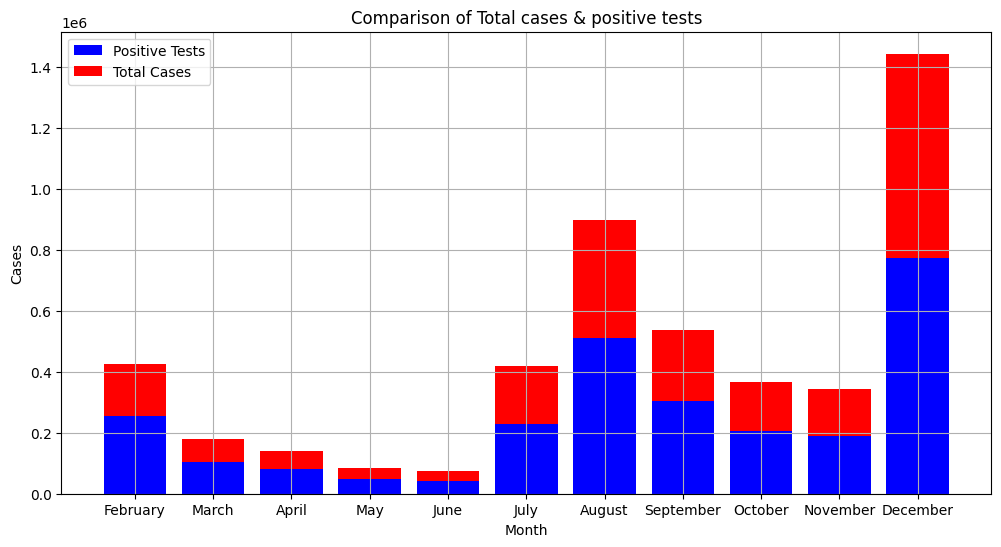

In [66]:
plt.figure(figsize = (12, 6))

# Create a stacked bar chart
plt.bar(covid_cases_2021.index, covid_cases_2021['positive_tests'], color = 'blue', label = 'Positive Tests')
plt.bar(covid_cases_2021.index, covid_cases_2021['cases'], bottom = covid_cases_2021['positive_tests'], color = 'red', label = 'Total Cases')

plt.title('Comparison of Total cases & positive tests')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.grid(True)
plt.legend()
plt.show()

**Interpretation:**
- The proportion of positive tests to total cases varies throughout the months, indicates a lower positivity rate, suggesting that not all tests conducted resulted in positive cases.

**Inference:**
- December has the highest counts for both positive tests and total cases, indicating a potential surge or higher testing rates during that month.
- The months of February, March, April, and May exhibit relatively lower counts for both positive tests and total cases.
- For August and September, indicates lower positivity rate compared to other months.

**4-2-2. Data pivoting**

Creating a pivot table for post population data in which we have the data based on month

In [67]:
# Converting cumulative population_vaccinated into daily count
post_vaccination['population_vaccinated'] = post_vaccination['population_vaccinated'].diff()

# Pivot table for post population data fror first year that is for the year 2021
post_vaccination_2021 = post_vaccination.pivot_table(index = post_vaccination['date'].dt.month_name(),
                                                values = ['population_vaccinated', 'population_unvaccinated'],
                                                aggfunc = 'sum')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the month index to a categorical data type with custom order
post_vaccination_2021.index = pd.Categorical(post_vaccination_2021.index, categories = month_order, ordered = True)

# Sort the pivot table based on the custom order
post_vaccination_2021.sort_index(inplace = True)

post_vaccination_2021.index.name = 'Month'

post_vaccination_2021

,population_unvaccinated,population_vaccinated
Month,,
January,427195514,707345.0
February,1326388636,1930441.0
March,1333128658,4372104.0
April,929232777,5759929.0
May,777993145,6041436.0
June,666371849,3233842.0
July,643463153,1424512.0
August,602318059,1068958.0
September,539700119,1317042.0


# Data visualization 4
Combined chart for Population vaccinated and Total cases

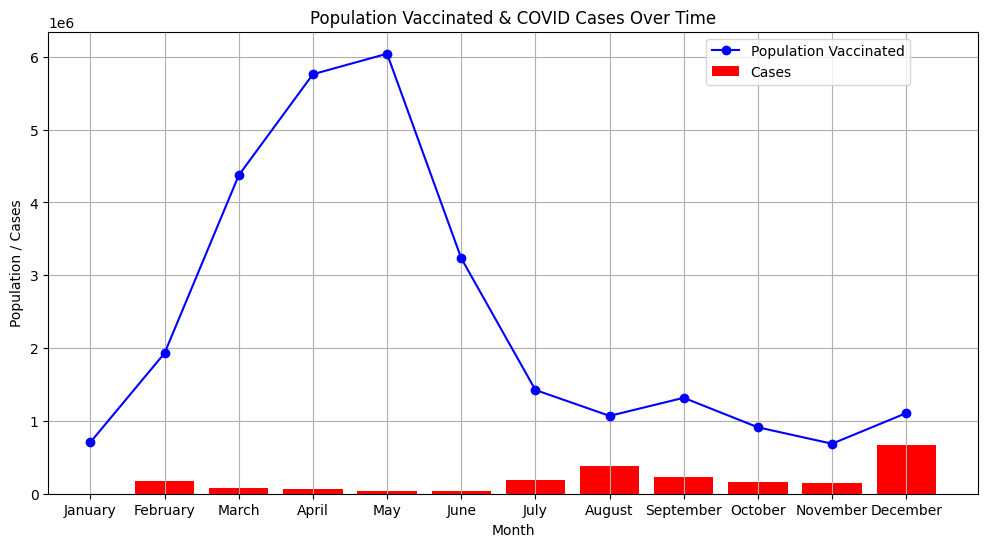

In [68]:
plt.figure(figsize = (12, 6))

# Bar chart for population vaccinated
plt.plot(post_vaccination_2021.index, post_vaccination_2021['population_vaccinated'], marker = 'o', linestyle = '-', color = 'blue', label = 'Population Vaccinated')

# Line chart for cases
plt.bar(covid_cases_2021.index, covid_cases_2021['cases'], color = 'red', label = 'Cases')

plt.title('Population Vaccinated & COVID Cases Over Time')
plt.xlabel('Month')
plt.ylabel('Population / Cases')
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (0.7, 1.0)) # Adjust legend position
plt.show()

**Interpretation:**
- There appears to be a correlation between the rise in the population vaccinated and the subsequent decline in COVID cases, especially from August onwards.
- The line chart representing the population vaccinated shows an increasing trend over the months, indicating a growing number of individuals getting vaccinated.
- Notable peaks in the population vaccinated, such as in May and August, are followed by decreases in COVID cases in the subsequent months.

**Inference:**
- The timing of vaccination efforts may be associated with a reduction in the spread of COVID-19.
- The vaccination efforts seem to have a potential impact on controlling the number of COVID cases, with a noticeable decline in cases as the population vaccination increases.
- The decline in cases from August onwards could be attributed to increased vaccination coverage, highlighting the potential success of vaccination campaigns.
- The initial months of the year, when vaccination coverage was lower, correspond to higher reported COVID cases.

# Conclusion

This project has provided a comprehensive analysis of the COVID-19 pandemic, focusing on the effectiveness of vaccination campaigns, the challenges and disparities in vaccine distribution, and temporal trends in COVID-19 cases and positivity rates. The findings highlight the importance of vaccination campaigns in controlling the spread of COVID-19, as well as the need for ongoing monitoring, adaptive strategies, and targeted interventions to address challenges and maximize successes.

**Key Findings:**
- Vaccination campaigns have played a critical role in reducing COVID-19 cases and deaths.
- Disparities in vaccine distribution exist, with lower vaccination rates in underserved communities.
- Temporal trends in COVID-19 cases and positivity rates reflect the dynamic nature of the pandemic.

**Recommendations:**
- Continued investment in vaccination campaigns is essential to reach a high level of population immunity.
- Targeted interventions are needed to address disparities in vaccine distribution and improve access in underserved communities.
- Ongoing monitoring of COVID-19 trends is crucial to identify and respond to emerging threats.


As the COVID-19 pandemic continues to evolve, it is important to remain vigilant and adapt strategies as needed. Vaccination campaigns, combined with effective public health measures, will be critical in controlling the spread of the virus and protecting the health of communities around the world.